In [3]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 43.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import seaborn as sns
import networkx as nx
from sklearn.metrics import accuracy_score, roc_auc_score


# Week 5 

In this example, ﻿Z﻿ = the likelihood of a biking accident, ﻿Y﻿ = speed, and ﻿X﻿ = trail difficulty. We assume that ﻿X﻿ decreases ﻿Y﻿ causally because people decrease their speed on difficult trails. In addition, ﻿Y﻿ and ﻿X﻿ both increase ﻿Z﻿ causally because fast biking on difficult trails leads to accidents. Difficulty will be on a scale from 0 to 1, speed in miles per hour, and likelihood of an accident also on a scale from 0 to 1. (Based on the numbers, I'd say these trails are quite challenging!) 

In [3]:
# Code to create data for this question 
num = 100000 
 
difficulty = np.random.uniform(0, 1, (num,)) 
 
speed = np.maximum(np.random.normal(15, 5, (num, )) - difficulty * 10, 0) 
 
accident = np.minimum(np.maximum(0.03 * speed + 0.4 * difficulty + np.random.normal(0, 0.3, (num,)), 0), 1) 
 
df = pd.DataFrame({'difficulty': difficulty, 'speed': speed, 'accident': accident}) 

Question 1: Use ﻿X﻿ to predict ﻿Y﻿ many times via regression with different data sets. Use many samples in each prediction. Which is closest to the average coefficient of ﻿X﻿ if you do the experiment enough times? 



In [ ]:
# runing regression many times to estimate average coefficient of X on Y
num_experiments = 1000

# store coefficients in a list
coeffs = []

for i in range(num_experiments):
    # take a random sample
    sample = df.sample(1000, replace=True)
    
    X = sm.add_constant(sample["difficulty"])
    y = sample["speed"]
    model = sm.OLS(y, X).fit()
    coeffs.append(model.params["difficulty"])

# find the average coefficient
avg_coef = np.mean(coeffs)
print(f"Average coefficient of difficulty (X) on speed (Y) = {avg_coef:.3f}")

Average coefficient of difficulty (X) on speed (Y) = -9.589


In [9]:
# increased number of samples

# runing regression many times to estimate average coefficient of X on Y
num_experiments = 1000

# store coefficients in a list
coeffs = []

for i in range(num_experiments):
    # take a random sample
    sample = df.sample(10000, replace=True)
    
    X = sm.add_constant(sample["difficulty"])
    y = sample["speed"]
    model = sm.OLS(y, X).fit()
    coeffs.append(model.params["difficulty"])

# find the average coefficient
avg_coef = np.mean(coeffs)
print(f"Average coefficient of difficulty (X) on speed (Y) = {avg_coef:.3f}")

Average coefficient of difficulty (X) on speed (Y) = -9.607


In [ ]:
# increased number of experiments (20s to run)

# runing regression many times to estimate average coefficient of X on Y
num_experiments = 10000

# store coefficients in a list
coeffs2 = []

for i in range(num_experiments):
    # take a random sample
    sample = df.sample(10000, replace=True)
    
    X = sm.add_constant(sample["difficulty"])
    y = sample["speed"]
    model = sm.OLS(y, X).fit()
    coeffs2.append(model.params["difficulty"])

# find the average coefficient
avg_coef = np.mean(coeffs2)
print(f"Average coefficient of difficulty (X) on speed (Y) = {avg_coef:.3f}")

Average coefficient of difficulty (X) on speed (Y) = -9.611


In [11]:
# increased number of samples, lower experiments

# runing regression many times to estimate average coefficient of X on Y
num_experiments = 1000

# store coefficients in a list
coeffs = []

for i in range(num_experiments):
    # take a random sample
    sample = df.sample(50000, replace=True)
    
    X = sm.add_constant(sample["difficulty"])
    y = sample["speed"]
    model = sm.OLS(y, X).fit()
    coeffs.append(model.params["difficulty"])

# find the average coefficient
avg_coef = np.mean(coeffs)
print(f"Average coefficient of difficulty (X) on speed (Y) = {avg_coef:.3f}")

Average coefficient of difficulty (X) on speed (Y) = -9.616


Option A
-9.661

Option B
-10.14

Option C
-9.243

Option D
-8.927

All experiments found coefficient of X to be around -9.6

In [13]:
model.params

const         14.903014
difficulty    -9.560471
dtype: float64

Question 2 

Then use ﻿X﻿ and ﻿Z﻿ to predict ﻿Y﻿ many times via regression with different datasets. Which of these is closest to the average coefficient of ﻿X﻿? 



Note: In practice, should we run such a regression? We are controlling for ﻿Z﻿, but ﻿Z﻿ is a collider. That is, ﻿Y﻿ and ﻿X﻿ both cause ﻿Z﻿. Should we control of it or are we better off ignoring ﻿Z﻿? Why or why not? 

Option A
-9.821

Option B
-10.85

Option C
-10.33

Option D
-11.23

In [21]:
num_experiments = 10000
sample_size = 20000
coeffs = []

for i in range(num_experiments):
    # Take a random sample from the dataset
    sample = df.sample(sample_size, replace=True)
    
    # controlling for the collider Z (accident), predicting Y based on X and Z 
    X = sm.add_constant(sample[["difficulty", "accident"]])
    y = sample["speed"]
    
    # Fit regression
    results = sm.OLS(y, X).fit()
    
    # Store the coefficient on difficulty
    coeffs.append(results.params["difficulty"])

# Compute the average coefficient
avg_coef = np.mean(coeffs)
print(f"Average coefficient of difficulty X (controlling for collider): {avg_coef:.3f}")

Average coefficient of difficulty X (controlling for collider): -10.290


Answer: we should not control for Z becuase it is a collider. It could introduce collider bias and influence the estimate of X --> Y.

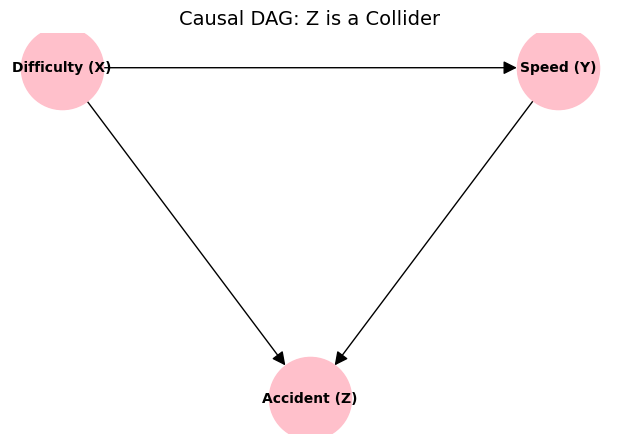

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define nodes
G.add_nodes_from(["Difficulty (X)", "Speed (Y)", "Accident (Z)"])

# Add directed edges for causal relationships
G.add_edges_from([
    ("Difficulty (X)", "Speed (Y)"),   # X → Y
    ("Difficulty (X)", "Accident (Z)"), # X → Z
    ("Speed (Y)", "Accident (Z)")      # Y → Z
])

# Draw the graph
pos = {
    "Difficulty (X)": (-1, 0),
    "Speed (Y)": (1, 0),
    "Accident (Z)": (0, -1)
}

plt.figure(figsize=(6, 4))
nx.draw(
    G, pos,
    with_labels=True,
    node_size=3500,
    node_color="pink",
    arrowsize=20,
    font_size=10,
    font_weight="bold"
)
plt.title("Causal DAG: Z is a Collider", fontsize=14)
plt.show()


# Week 6

Given a dataset, match treated (﻿X equals 1﻿) to untreated (﻿X equals 0﻿) based on the confounder (﻿Z﻿).

Find the average treatment effect (each item corresponds to one counterfactual) where the counterfactual is the nearest item in the other group (you can use ﻿N e a r e s t N e i g h b o r s﻿ for this.)

Find the average treatment effect on the treated, where each treated item corresponds to a counterfactual untreated item, but we otherwise ignore the untreated items.

Find the average treatment effect on the untreated, where each untreated item corresponds to a counterfactual treated item, but we otherwise ignore the treated items.

Find the optimal treatment effect, which is the maximum treatment effect across all untreated items (i.e., it ends up considering only a single untreated item with its single counterfactual). 

Use the file homework_6.1.csv. 

Question 1

Which is closest to the average treatment effect? 

Option A
1.832

Option B
1.695

Option C
2.014

Option D
1.583

In [3]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [4]:
df6 = pd.read_csv("homework_6.1.csv")

In [5]:
df6.head()

,Z,X,Y
0,0.548814,0,-0.823220
1,0.715189,1,0.842405
2,0.602763,1,0.898618
3,0.544883,0,-0.817325
4,0.423655,0,-0.635482


In [7]:
# create treated and untreated groups
treated = df6[df6["X"] == 1].reset_index(drop=True)
untreated = df6[df6["X"] == 0].reset_index(drop=True)

# nearest neighbors match function
def nearest_match(source, target):
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(target[["Z"]])
    distances, indices = nn.kneighbors(source[["Z"]])
    return indices.flatten()

# Match treated to untreated and untreated to treated
treated_to_untreated_idx = nearest_match(treated, untreated)
untreated_to_treated_idx = nearest_match(untreated, treated)

# Counterfactuals
treated["Y_cf"] = untreated.loc[treated_to_untreated_idx, "Y"].values
untreated["Y_cf"] = treated.loc[untreated_to_treated_idx, "Y"].values

# treatment effects
treated["TE"] = treated["Y"] - treated["Y_cf"]
untreated["TE"] = treated.loc[untreated_to_treated_idx, "Y"].values - untreated["Y"]

# ATE = average of all treatment effects (both groups)
ate = (treated["TE"].mean() + untreated["TE"].mean()) / 2

# ATT = average treatment effect on treated
att = treated["TE"].mean()

# ATU = average treatment effect on untreated
atu = untreated["TE"].mean()

# Optimal treatment effect (maximum TE among untreated)
optimal_te = untreated["TE"].max()

# 4. Print results
print(f"Average Treatment Effect (ATE): {ate:.4f}")
print(f"Average Treatment Effect on Treated (ATT): {att:.4f}")
print(f"Average Treatment Effect on Untreated (ATU): {atu:.4f}")
print(f"Optimal Treatment Effect: {optimal_te:.4f}")

Average Treatment Effect (ATE): 1.6979
Average Treatment Effect on Treated (ATT): 1.8464
Average Treatment Effect on Untreated (ATU): 1.5495
Optimal Treatment Effect: 2.1725


# Week 7

Question 1

Suppose that a process can be modeled via linear regression: 


W = np.random.normal(0, 1, (1000,))
X = W + np.random.normal(0, 1, (1000,)) Z = np.random.normal(0, 1, (1000,)) 
Y = X + Z + W + np.random.normal(0, 1, (1000,))
 


Which is closest to the correlation of ﻿X﻿ with the error term in the equation for ﻿Y﻿? 

In [6]:
W = np.random.normal(0, 1, (1000,))
X = W + np.random.normal(0, 1, (1000,)) 
Z = np.random.normal(0, 1, (1000,)) 
Y = X + Z + W + np.random.normal(0, 1, (1000,))

the error term is 
error = Z + W + np.random.normal(0, 1, num)


In [12]:
W = np.random.normal(0, 1, (1000,))
X = W + np.random.normal(0, 1, (1000,))
Z = np.random.normal(0, 1, (1000,))
Y = X + Z + W + np.random.normal(0, 1, (1000,))

# when Y is modeled as depending only on X, the error term = Z + W + random noise
error = Z + W + np.random.normal(0, 1, (1000,))

# compute correlation between X and the error term
corr = np.corrcoef(X, error)[0, 1]
print("Correlation between X and the error term:", corr)

Correlation between X and the error term: 0.40335501644287275


Question 2


If ﻿Y﻿ is written as depending on ﻿X﻿ and ﻿Z﻿ only, ﻿W﻿ is part of the error term. Which, then, is closest to the expected correlation of ﻿X﻿ with the error term in the equation for ﻿Y﻿? 



In [8]:

W = np.random.normal(0, 1, (1000,))
X = W + np.random.normal(0, 1, (1000,))
Z = np.random.normal(0, 1, (1000,))
Y = X + Z + W + np.random.normal(0, 1, (1000,))

# since Y depends on X and Z only, the error term contains W + random noise
error = W + np.random.normal(0, 1, (1000,))

# compute correlation between X and the error term
corr = np.corrcoef(X, error)[0, 1]
print("Correlation between X and the error term:", corr)


Correlation between X and the error term: 0.48407444829165097


Question 3

In the data frame for homework_7.1.csv, control for W by regressing ﻿Y﻿ on ﻿X﻿ and ﻿Z﻿ at the following constant values of ﻿W﻿: -1, 0, and 1. (You cannot literally use a constant value of ﻿W﻿, of course, or you will have only one data point! How will you manage this?) The question is: Is the coefficient of ﻿X﻿  

Option A
increasing

Option B
decreasing

Option C
staying about the same (say, within 0.2 or so) as ﻿W﻿ increases? 

In [13]:
df7 = pd.read_csv("homework_7.1.csv")
df7.head()

,Unnamed: 0,X,W,Z,Y
0,0,1.137055,1.221768,0.327829,1.944532
1,1,-0.112905,0.465835,0.599650,0.655514
2,2,2.077755,1.795414,-0.063393,5.934411
3,3,0.456373,-0.512159,1.177413,-0.188064
4,4,-1.012402,0.080002,-0.275697,-0.533775


In [16]:
# Subset the data where W is close to -1
df_w_neg1 = df7[(df7['W'] > -1.5) & (df7['W'] < -0.5)]
model_neg1 = sm.OLS(df_w_neg1['Y'], sm.add_constant(df_w_neg1[['X', 'Z']])).fit()
print("When W is around -1, coefficient of X =", model_neg1.params['X'])

# W around 0
df_w_0 = df7[(df7['W'] > -0.5) & (df7['W'] < 0.5)]
model_0 = sm.OLS(df_w_0['Y'], sm.add_constant(df_w_0[['X', 'Z']])).fit()
print("When W is around 0, coefficient of X =", model_0.params['X'])

# W around 1
df_w_1 = df7[(df7['W'] > 0.5) & (df7['W'] < 1.5)]
model_1 = sm.OLS(df_w_1['Y'], sm.add_constant(df_w_1[['X', 'Z']])).fit()
print("When W is around 1, coefficient of X =", model_1.params['X'])


When W is around -1, coefficient of X = 0.990090408694134
When W is around 0, coefficient of X = 1.4859822514480032
When W is around 1, coefficient of X = 1.9936504417092331


Question 4


def make_error(corr_const, num): 

 err = list() 

    prev = np.random.normal(0, 1) 

 for n in range(num): 

    prev = corr_const * prev + (1 - corr_const) * np.random.normal(0, 1) 

    err.append(prev) 

return np.array(err) 



Create a linear regression model that uses this function as the error for both (a) the treatment, ﻿X﻿, and (b) the outcome, ﻿Y﻿. (You can use random normal error for any other covariates, if you have them.) 



As corr_const increases from 0.2 to 0.5 to 0.8, find (i) the standard deviation of the estimate of the ﻿X﻿ coefficient over many trials, and (ii) the mean of the standard error estimate of the ﻿X﻿ coefficient over many trials. 



When corr_const increases, then: 



Hint: don't forget to include an intercept in your regression

Option A
(i) and (ii) remain about the same

Option B
The ratio (i) / (ii) decreases

Option C
(i) and (ii) differ, but their ratio remains about the same

Option D
The ratio (i) / (ii) increases



In [17]:
# Function to make correlated errors
def make_error(corr_const, num):
    err = []
    prev = np.random.normal(0, 1)
    for i in range(num):
        prev = corr_const * prev + (1 - corr_const) * np.random.normal(0, 1)
        err.append(prev)
    return np.array(err)

corr_levels = [0.2, 0.5, 0.8]

# To store the results
results = []

# Fix random seed so we can reproduce results
np.random.seed(42)

# For each correlation level
for corr_const in corr_levels:
    all_betas = []
    all_ses = []
    
    # Run many simulations
    for i in range(100):  # 100 trials
        n = 1000
        
        # Create errors for X and Y
        eX = make_error(corr_const, n)
        eY = make_error(corr_const, n)
        
        # Generate data
        Z = np.random.normal(0, 1, n)
        X = 0.5 * Z + eX
        Y = 1.0 * X + 0.3 * Z + eY
        
        # Run regression: Y ~ X + Z
        X_matrix = sm.add_constant(np.column_stack([X, Z]))
        model = sm.OLS(Y, X_matrix).fit()
        
        # Save the coefficient for X and its standard error
        all_betas.append(model.params[1])  # X coefficient
        all_ses.append(model.bse[1])       # X standard error
    
    # Compute (i) and (ii)
    std_dev_of_betas = np.std(all_betas)
    mean_se = np.mean(all_ses)
    ratio = std_dev_of_betas / mean_se
    
    # Save the results
    results.append([corr_const, std_dev_of_betas, mean_se, ratio])

# Show results
results_df = pd.DataFrame(results, columns=["corr_const", "(i) std of β_X", "(ii) mean SE", "ratio (i)/(ii)"])
print(results_df)


   corr_const  (i) std of β_X  (ii) mean SE  ratio (i)/(ii)
0         0.2        0.029915      0.031531        0.948757
1         0.5        0.041477      0.031510        1.316324
2         0.8        0.067064      0.031621        2.120874
